<a href="https://colab.research.google.com/github/MulamHema/ml_intern/blob/main/task2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Electric_Vehicle_Population_Data (1).csv')
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(df.head())


   VIN (1-10)    County       City State  Postal Code  Model Year    Make  \
0  5YJYGDEF5L  Thurston      Lacey    WA      98516.0        2020   TESLA   
1  1N4BZ1CP1K      King  Sammamish    WA      98074.0        2019  NISSAN   
2  5YJXCDE28G      King       Kent    WA      98031.0        2016   TESLA   
3  JHMZC5F37M    Kitsap    Poulsbo    WA      98370.0        2021   HONDA   
4  WA1F2AFY4P  Thurston    Olympia    WA      98501.0        2023    AUDI   

     Model                   Electric Vehicle Type  \
0  MODEL Y          Battery Electric Vehicle (BEV)   
1     LEAF          Battery Electric Vehicle (BEV)   
2  MODEL X          Battery Electric Vehicle (BEV)   
3  CLARITY  Plug-in Hybrid Electric Vehicle (PHEV)   
4     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible           291.0   
1           Clean Alternative Fuel Vehicle Eligible           150.0   

In [ ]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
        Postal Code    Model Year  Electric Range      Base MSRP  \
count  26172.000000  26173.000000    26172.000000   26172.000000   
mean   98173.945858   2020.382570       63.622001    1198.667278   
std      211.290571      2.939103       94.685833    8693.594900   
min    98001.000000   2000.000000        0.000000       0.000000   
25%    98033.000000   2018.000000        0.000000       0.000000   
50%    98108.000000   2021.000000        6.000000       0.000000   
75%    98188.000000   2023.000000       84.000000       0.000000   
max    99362.000000   2024.000000      337.000000  184400.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count          26171.000000    2.617200e+04       2.617100e+04  
mean              32.561270    2.165716e+08       5.303340e+10  
std               14.545406    7.938145e+07       1.155842e+07  
min                1.000000    1.100570e+05       5.300796e+10  
25%               20.000000    1.78637

In [ ]:
# Univariate Analysis - Histograms for Numeric Variables
numeric_variables = df.select_dtypes(include=['float64', 'int64']).columns

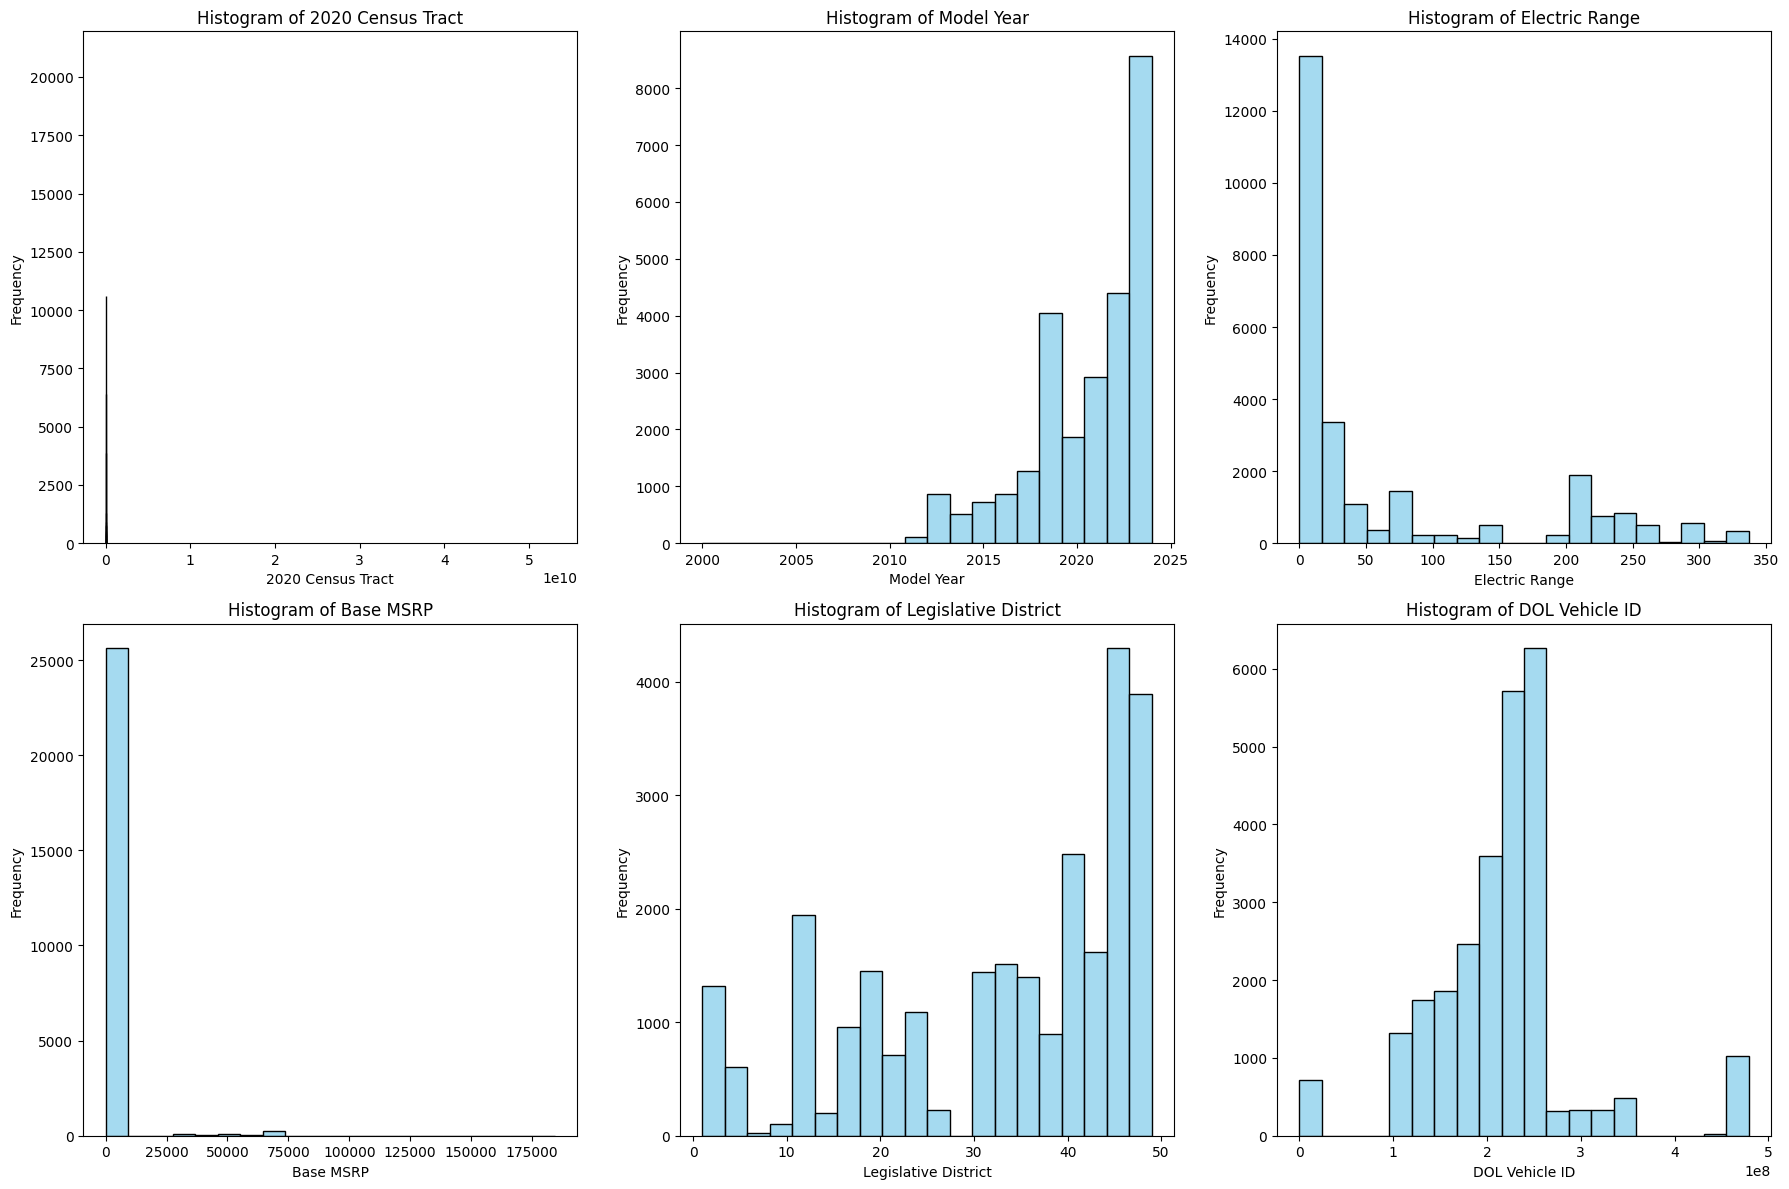

In [ ]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_variables):
    plt.subplot(2, 3, i % 6 + 1)
    sns.histplot(df[column], bins=20, kde=False, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

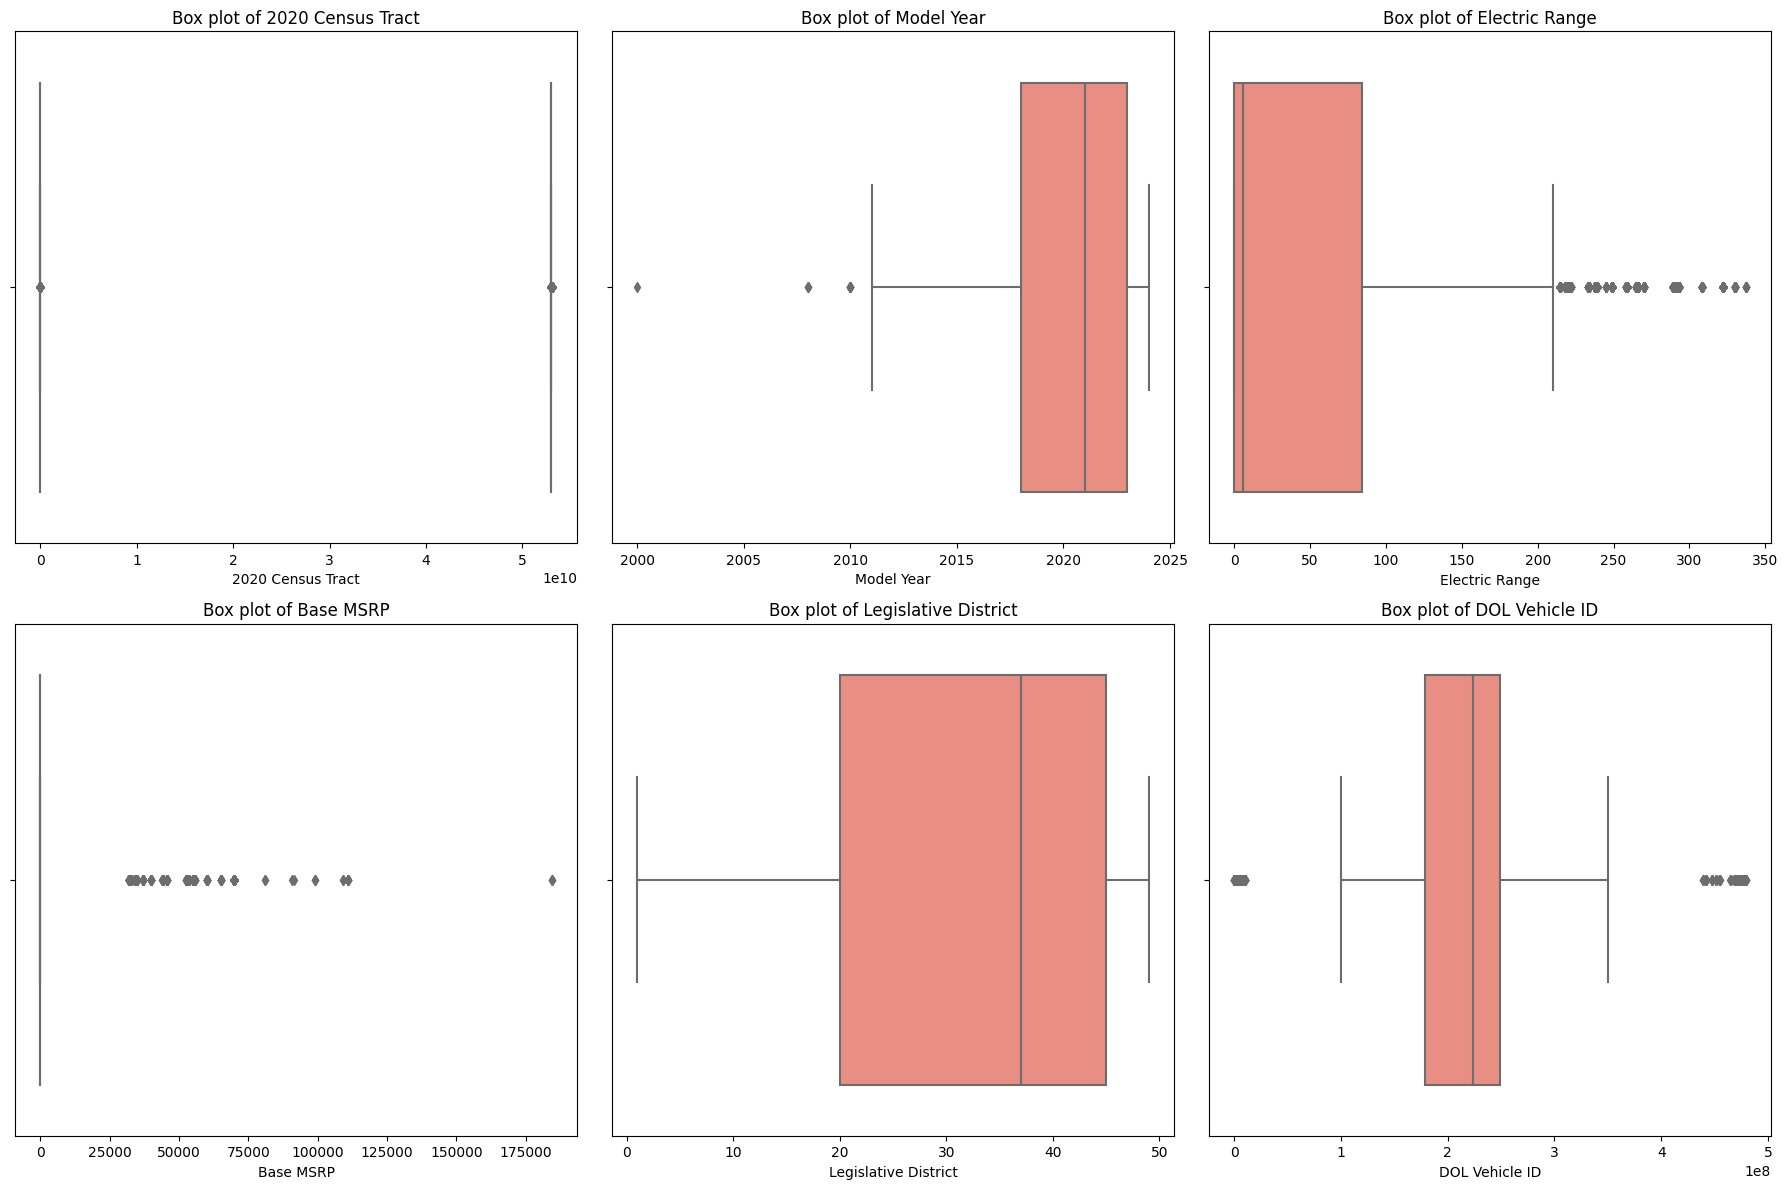

In [ ]:
# Univariate Analysis - Box Plots for Numeric Variables
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_variables):
    plt.subplot(2, 3, i % 6 + 1)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()


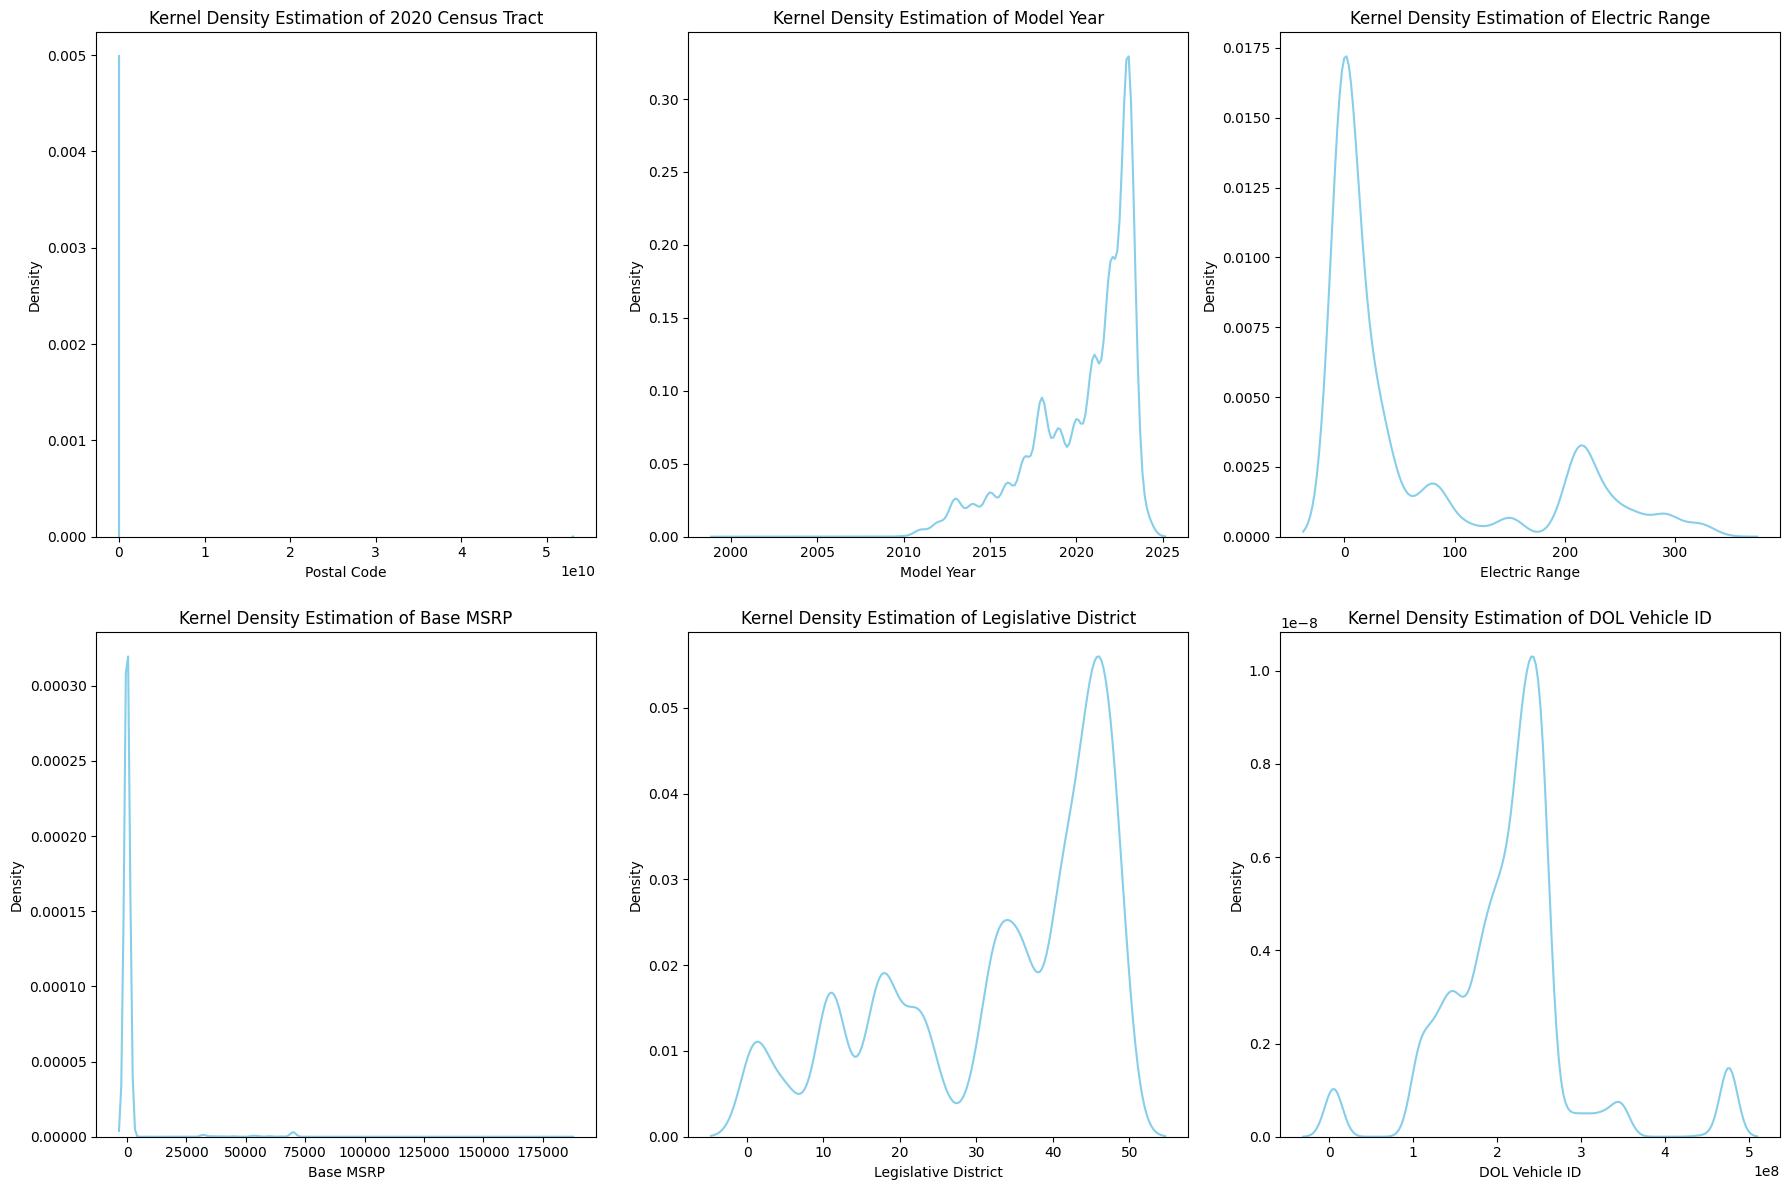

In [ ]:
# Univariate Analysis - Probability Density Plots (Kernel Density Estimation)
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_variables):
    plt.subplot(2, 3, i % 6 + 1)
    sns.kdeplot(df[column], color='skyblue')
    plt.title(f'Kernel Density Estimation of {column}')

plt.tight_layout()
plt.show()

In [ ]:
#bivariate analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [ ]:
# Bivariate Analysis - Scatter Plot and Correlation Analysis (Numeric Variables)
numeric_variables = df.select_dtypes(include=['float64', 'int64']).columns

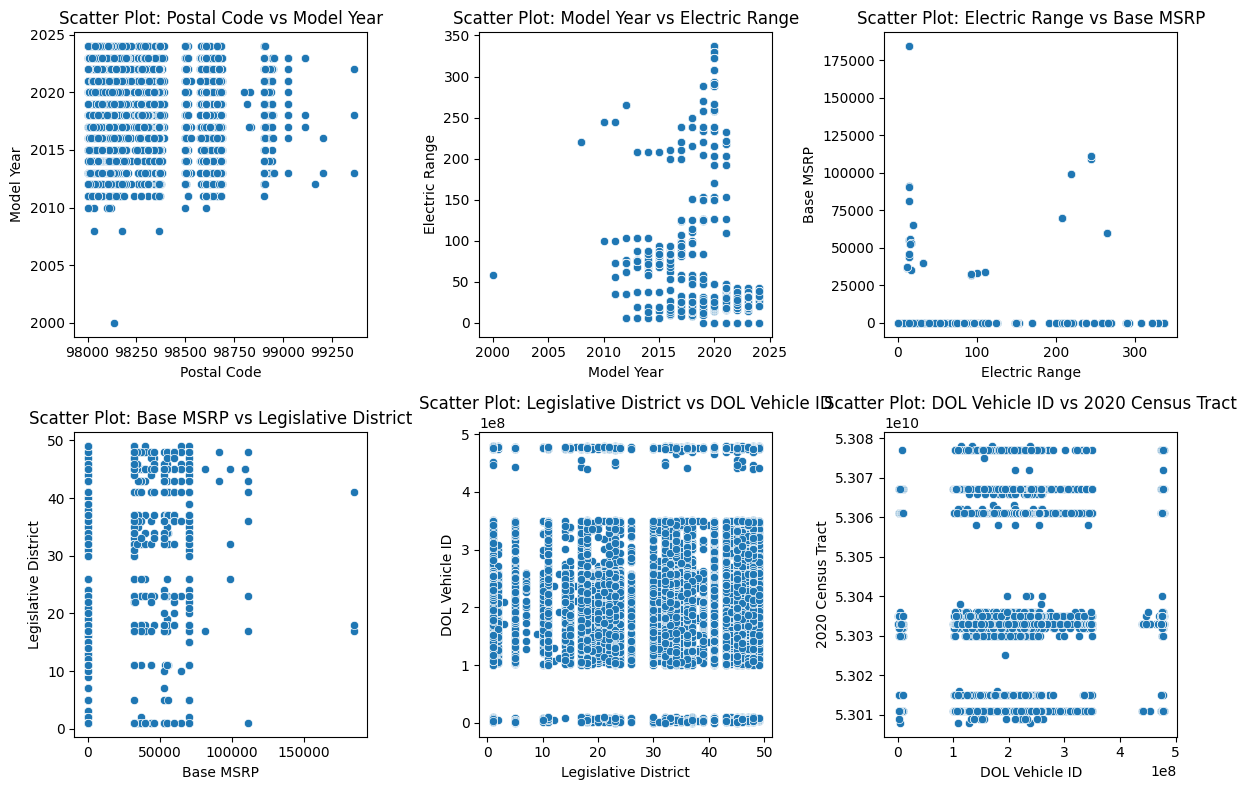

In [ ]:
# Scatter plots
plt.figure(figsize=(12, 8))
for i in range(len(numeric_variables) - 1):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[numeric_variables[i]], y=df[numeric_variables[i + 1]])
    plt.title(f'Scatter Plot: {numeric_variables[i]} vs {numeric_variables[i + 1]}')

plt.tight_layout()
plt.show()

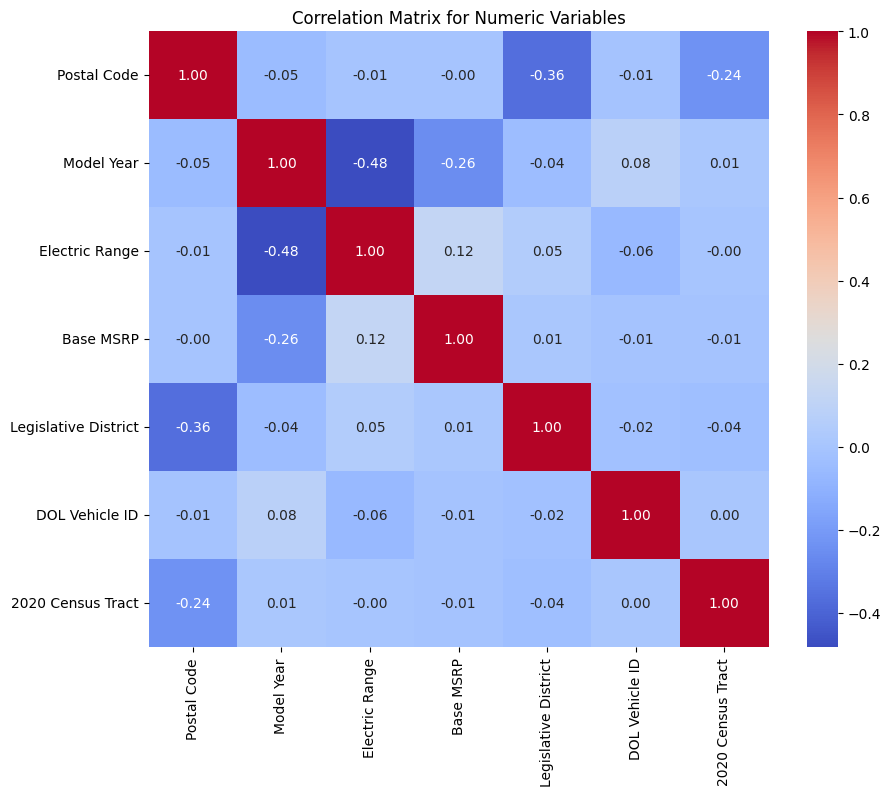

In [ ]:
# Correlation matrix
correlation_matrix = df[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Variables')
plt.show()


In [ ]:
# Bivariate Analysis - Contingency Table and Chi-Square Test (Categorical Variables)
categorical_variables = ['Make', 'Electric Vehicle Type']

In [ ]:
# Contingency tables and chi-square tests
for column in categorical_variables:
    contingency_table = pd.crosstab(df[column], df[numeric_variables[0]])  # Assuming numeric_variables[0] is a numeric column
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"\nChi-square test for {column} vs. {numeric_variables[0]}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")



Chi-square test for Make vs. Postal Code:
Chi-square statistic: 21042.581299544865
P-value: 0.0

Chi-square test for Electric Vehicle Type vs. Postal Code:
Chi-square statistic: 1844.5244080977163
P-value: 2.963572322982571e-261


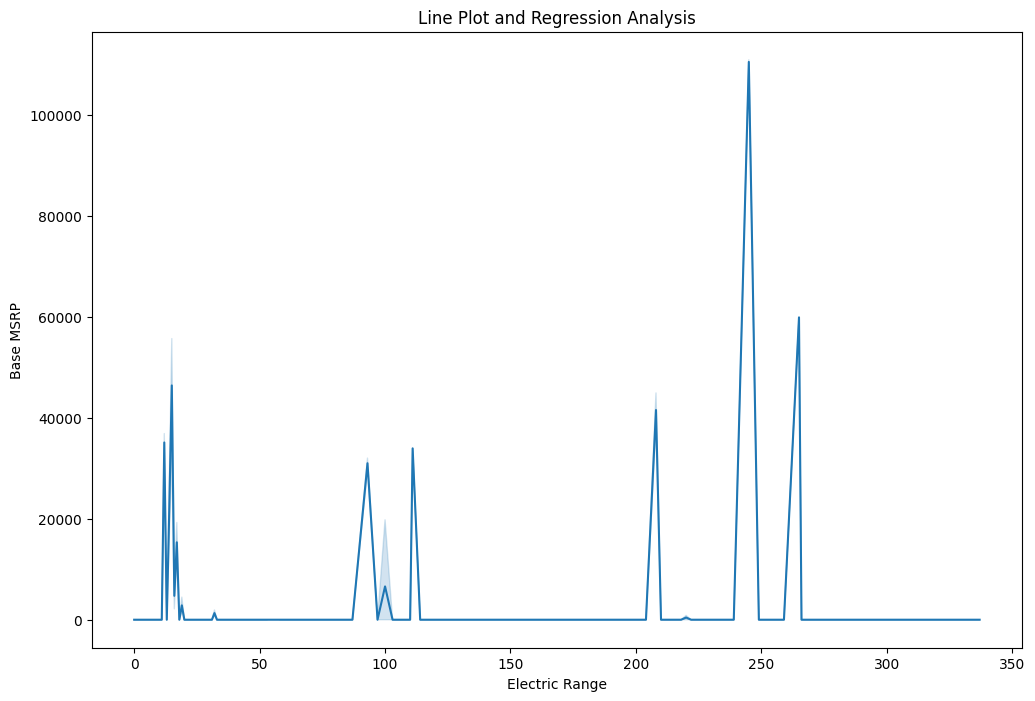

In [ ]:
# Bivariate Analysis - Line Plot and Regression Analysis
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['Electric Range'], y=df['Base MSRP'])
plt.title('Line Plot and Regression Analysis')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()